# Atividade (1.5 pt): Visualização de casos de COVID-19 no Piauí (equipe 3 integrantes)


### Apresentar um jupyter notebook atendendo os seguintes itens:

1. Filtrar os dados para selecionar apenas aqueles referentes ao estado do Piauí. Se uma cidade possui mais de 1 amostra, selecionar aquela mais recente (nota: as datas estão em ordem decrescente);
2. Plotar um mapa com a localização e número de casos;
3. Indicar o número de amostras, atributos e dados faltantes (se existir) do conjunto de dados;
4. Apresentar as estatísticas descritivas dos atributos não categóricos;
5. Apresentar os histogramas dos atributos não categóricos;
6. Capturar as latitudes e longitudes para cada 1 dos municípios presentes na base de dados e adicionar as colunas latitude e longitude nos dados;
7. Apresentar um gráfico da latitude x longitude, onde cada amostra será representada por um círculo e quanto maior o valor do campo estimated_population, maior o raio do círculo que representa aquela amostra. Já a cor representa a taxa de mortalidade (death_rate), quão maior esse índice, mais próximo do vermelho;
8. Calcular a matriz de correlação;
9. Verificar a correlação entre o atributo death_rate e os demais atributos não categóricos;

## Importandos as bibliotecas

In [1]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt 
import requests
from urllib.parse import urlencode
import csv
from mpl_toolkits.basemap import Basemap
import numpy as np

## Pegando os Dados da API Brasil.io

In [2]:
token = '2f96e5c9fa32c083b49ee0545c78418556b869e6'

base_url = "https://api.brasil.io/v1/dataset/covid19/caso/data"

header = {
    "User-Agent": "python-urllib/brasilio-client-0.1.0",
    "Authorization": f"Token {token}"
}

filters = {"state": "PI", "is_last": True}
if filters:
    request = base_url + "?" + urlencode(filters)

response = requests.get(request, headers=header)
responseData = response.json()['results']


## Transformando os dados em CSV

In [4]:
def salvarCSV(caminho, nomeArquivo):
    file = os.path.join(caminho, nomeArquivo)

    with open(file, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = [
            'city',
            'city_ibge_code',
            'confirmed',
            'confirmed_per_100k_inhabitants',
            'date',
            'death_rate',
            'deaths',
            'estimated_population',
            'estimated_population_2019',
            'is_last',
            'order_for_place',
            'place_type',
            'state'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in responseData:
            writer.writerow(i)
salvarCSV('/home/daniel/Área de Trabalho/Sistemas Inteligentes/Sistemas-Inteligentes/Atv 1', 'meuCSV.csv')

## Carregar os Dados

In [6]:
caminho = '/home/daniel/Área de Trabalho/Sistemas Inteligentes/Sistemas-Inteligentes/Atv 1'
nomeArq = 'meuCSV.csv'
def carregarDados(caminho, nomeArq):
    csv_path = os.path.join(caminho, nomeArq)
    return pd.read_csv(csv_path)
dataset = carregarDados(caminho, nomeArq)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            224 non-null    object 
 1   city_ibge_code                  225 non-null    int64  
 2   confirmed                       225 non-null    int64  
 3   confirmed_per_100k_inhabitants  225 non-null    float64
 4   date                            225 non-null    object 
 5   death_rate                      225 non-null    float64
 6   deaths                          225 non-null    int64  
 7   estimated_population            225 non-null    int64  
 8   estimated_population_2019       225 non-null    int64  
 9   is_last                         225 non-null    bool   
 10  order_for_place                 225 non-null    int64  
 11  place_type                      225 non-null    object 
 12  state                           225 

## Filtrar os Dados mais Recentes

In [7]:
dadosDoPiaui = dataset[(dataset['is_last'] == True)&(dataset['state'] == 'PI')&(dataset['place_type'] == 'city')]

dadosDoPiaui.head()

,city,city_ibge_code,confirmed,confirmed_per_100k_inhabitants,date,death_rate,deaths,estimated_population,estimated_population_2019,is_last,order_for_place,place_type,state
0,Acauã,2200053,228,3210.36328,2022-03-26,0.0088,2,7102,7084,True,658,city,PI
1,Agricolândia,2200103,829,16156.69460,2022-03-26,0.0121,10,5131,5139,True,650,city,PI
2,Água Branca,2200202,1702,9742.41557,2022-03-26,0.0452,77,17470,17411,True,699,city,PI
3,Alagoinha do Piauí,2200251,402,5244.61840,2022-03-26,0.0323,13,7665,7651,True,664,city,PI
4,Alegrete do Piauí,2200277,553,11244.40830,2022-03-26,0.0163,9,4918,4915,True,646,city,PI


## Latitude e Longitude (É necessario para plotar o mapa)

In [8]:
latitudes = []
longitudes = []

for city in dadosDoPiaui['city']:
    print(city)
    request = 'https://nominatim.openstreetmap.org/search?city='+city+'&state=Piaui&format=json'
    response = requests.get(request)
    response_data = response.json()[0]
    
    latitude = float(response_data["lat"])
    longitude = float(response_data["lon"])
    latitudes.append(latitude)
    longitudes.append(longitude)

len(latitudes)
len(longitudes)
    
dadosDoPiaui['latitude'] = latitudes
dadosDoPiaui['longitude'] = longitudes

dadosDoPiaui.info()

Acauã
Agricolândia
Água Branca
Alagoinha do Piauí
Alegrete do Piauí
Alto Longá
Altos
Alvorada do Gurguéia
Amarante
Angical do Piauí
Anísio de Abreu
Antônio Almeida
Aroazes
Aroeiras do Itaim
Arraial
Assunção do Piauí
Avelino Lopes
Baixa Grande do Ribeiro
Barra D'Alcântara
Barras
Barreiras do Piauí
Barro Duro
Batalha
Bela Vista do Piauí
Belém do Piauí
Beneditinos
Bertolínia
Betânia do Piauí
Boa Hora
Bocaina
Bom Jesus
Bom Princípio do Piauí
Bonfim do Piauí
Boqueirão do Piauí
Brasileira
Brejo do Piauí
Buriti dos Lopes
Buriti dos Montes
Cabeceiras do Piauí
Cajazeiras do Piauí
Cajueiro da Praia
Caldeirão Grande do Piauí
Campinas do Piauí
Campo Alegre do Fidalgo
Campo Grande do Piauí
Campo Largo do Piauí
Campo Maior
Canavieira
Canto do Buriti
Capitão de Campos
Capitão Gervásio Oliveira
Caracol
Caraúbas do Piauí
Caridade do Piauí
Castelo do Piauí
Caxingó
Cocal
Cocal de Telha
Cocal dos Alves
Coivaras
Colônia do Gurguéia
Colônia do Piauí
Conceição do Canindé
Coronel José Dias
Corrente
Cristalând

/tmp/ipykernel_3597/1209496809.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosDoPiaui['latitude'] = latitudes
/tmp/ipykernel_3597/1209496809.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosDoPiaui['longitude'] = longitudes


## Plotando Mapa

In [9]:
def plotMap(lat1, lat2, lon1, lon2, xmap, ymap):
    plt.figure(figsize=(xmap, ymap))
    map = Basemap(projection='cyl',
    resolution='h',
    llcrnrlat=lat1,
    urcrnrlat=lat2,
    llcrnrlon=lon1,
    urcrnrlon=lon2
    )
    map.drawcoastlines()
    map.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
    map.drawmapboundary(fill_color='lightskyblue')
    map.drawstates(color='black')
    map.drawparallels(np.arange(lat1, lat2 + 0.5, 2), labels=[1, 0, 0, 0])
    map.drawmeridians(np.arange(lon1, lon2 + 0.5, 2), labels=[0, 0, 0, 1])
    return map

multiplot = 1
lat1 = dadosDoPiaui['latitude'].min() - multiplot if dadosDoPiaui['latitude'].min() < 0 else dadosDoPiaui['latitude'].min() + multiplot
lat2 = dadosDoPiaui['latitude'].max() + multiplot if dadosDoPiaui['latitude'].max() < 0 else dadosDoPiaui['latitude'].max() - multiplot
lon1 = dadosDoPiaui['longitude'].min() - multiplot if dadosDoPiaui['longitude'].min() < 0 else dadosDoPiaui['longitude'].min() + multiplot
lon2 = dadosDoPiaui['longitude'].max() + multiplot if dadosDoPiaui['longitude'].max() < 0 else dadosDoPiaui['longitude'].max() - multiplot

lat1, lat2 = round(lat1, 4), round(lat2, 4)
lon1, lon2 = round(lon1, 4), round(lon2, 4)



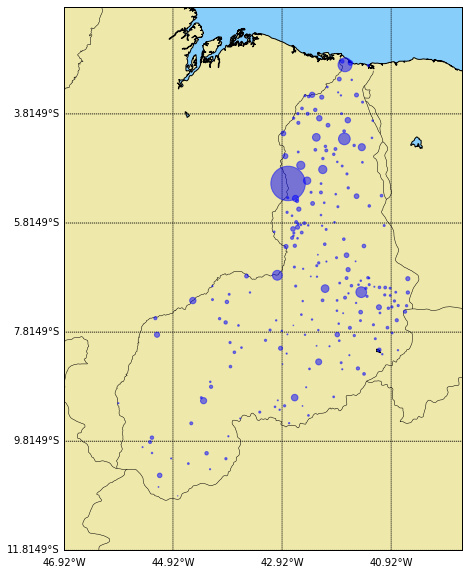

In [11]:
map = plotMap(lat1, lat2, lon1, lon2, 15, 10)
map.scatter(
    x = dadosDoPiaui['longitude'].values,
    y = dadosDoPiaui['latitude'].values,
    s = dadosDoPiaui['confirmed']/100, c='blue',
    alpha = 0.5,
    marker='o',
    zorder=6
)

## Indicar o número de amostras

In [12]:
dadosDoPiaui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            224 non-null    object 
 1   city_ibge_code                  224 non-null    int64  
 2   confirmed                       224 non-null    int64  
 3   confirmed_per_100k_inhabitants  224 non-null    float64
 4   date                            224 non-null    object 
 5   death_rate                      224 non-null    float64
 6   deaths                          224 non-null    int64  
 7   estimated_population            224 non-null    int64  
 8   estimated_population_2019       224 non-null    int64  
 9   is_last                         224 non-null    bool   
 10  order_for_place                 224 non-null    int64  
 11  place_type                      224 non-null    object 
 12  state                           224 

## Apresentar as estatísticas descritivas dos atributos não categóricos

In [13]:
dadosDoPiaui.describe()

,city_ibge_code,confirmed,confirmed_per_100k_inhabitants,death_rate,deaths,estimated_population,estimated_population_2019,order_for_place,latitude,longitude
count,2.240000e+02,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,2.205694e+06,1640.691964,8815.041859,0.025938,34.468750,14649.464286,14612.620536,672.339286,-6.668563,-42.396661
std,3.333670e+03,8166.097436,5032.709500,0.023238,188.018721,59102.962350,58886.634217,27.566000,1.851417,1.095386
min,2.200053e+06,25.000000,724.427700,0.001800,1.000000,1242.000000,1246.000000,560.000000,-10.814913,-45.919955
25%,2.202690e+06,277.500000,4849.050675,0.013300,5.000000,4511.000000,4503.000000,656.750000,-7.861111,-42.811012
50%,2.205548e+06,500.000000,7833.581075,0.020500,10.000000,6250.500000,6246.500000,674.000000,-6.967733,-42.242550
75%,2.208662e+06,993.250000,11722.772693,0.031125,19.000000,10725.250000,10715.250000,694.000000,-5.344224,-41.673860
max,2.211704e+06,119192.000000,27500.000000,0.152200,2760.000000,868075.000000,864845.000000,734.000000,-2.852008,-40.614725


## Apresentar os histogramas dos atributos não categóricos

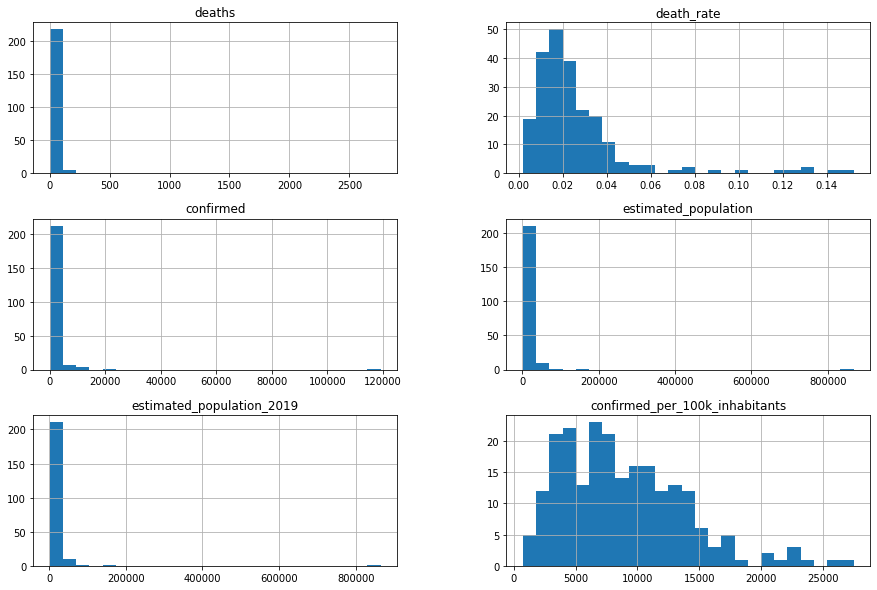

In [14]:
dadosDoPiaui.hist(['deaths', 'death_rate', 'confirmed', 'estimated_population', 'estimated_population_2019', 'confirmed_per_100k_inhabitants'], bins=25, figsize=(15,10))
plt.show()


## Apresentar um gráfico da latitude x longitude, onde cada amostra será representada por um círculo e quanto maior

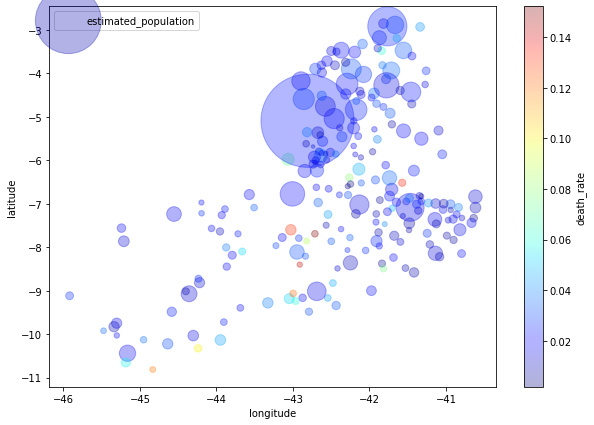

In [15]:
dadosDoPiaui.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
    s=dadosDoPiaui['estimated_population']/100, label='estimated_population', figsize=(10,7),
    c='death_rate', cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False)
plt.legend()

## Calcular a matriz de correlação

In [16]:
dadosDoPiaui = dadosDoPiaui.drop(columns=['is_last', 'city_ibge_code'])

matriz_correlacao = dadosDoPiaui.corr()

matriz_correlacao

,confirmed,confirmed_per_100k_inhabitants,death_rate,deaths,estimated_population,estimated_population_2019,order_for_place,latitude,longitude
confirmed,1.000000,0.171124,-0.042708,0.996755,0.996275,0.996277,0.241685,0.112936,-0.015459
confirmed_per_100k_inhabitants,0.171124,1.000000,-0.488274,0.129136,0.117971,0.118028,0.209144,0.180949,-0.006406
death_rate,-0.042708,-0.488274,1.000000,-0.010849,-0.022938,-0.022951,-0.010620,-0.166103,-0.169169
deaths,0.996755,0.129136,-0.010849,1.000000,0.997791,0.997786,0.234446,0.115278,-0.016667
estimated_population,0.996275,0.117971,-0.022938,0.997791,1.000000,1.000000,0.246476,0.118599,-0.012696
estimated_population_2019,0.996277,0.118028,-0.022951,0.997786,1.000000,1.000000,0.246578,0.118687,-0.012645
order_for_place,0.241685,0.209144,-0.010620,0.234446,0.246476,0.246578,1.000000,0.212640,0.092615
latitude,0.112936,0.180949,-0.166103,0.115278,0.118599,0.118687,0.212640,1.000000,0.427200
longitude,-0.015459,-0.006406,-0.169169,-0.016667,-0.012696,-0.012645,0.092615,0.427200,1.000000


## Verificar a correlação entre o atributo death_rate e os demais atributos não categóricos

death_rate                        1.000000
order_for_place                  -0.010620
deaths                           -0.010849
estimated_population             -0.022938
estimated_population_2019        -0.022951
confirmed                        -0.042708
latitude                         -0.166103
longitude                        -0.169169
confirmed_per_100k_inhabitants   -0.488274
Name: death_rate, dtype: float64


(0.0, 0.2, 0.0, 30000.0)

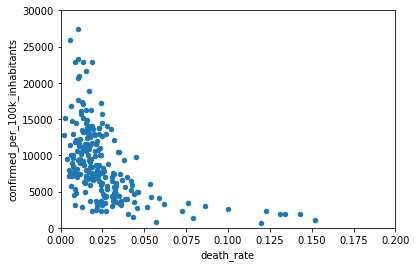

In [17]:
print(matriz_correlacao['death_rate'].sort_values(ascending=False))

dadosDoPiaui.plot(kind='scatter', x='death_rate', y='confirmed_per_100k_inhabitants')
plt.axis([0, 0.2, 0, 30000])